In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [9]:
filename = 'sales_data.csv'
df = pd.read_csv(filename, index_col=0)
df.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)


In [12]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.9


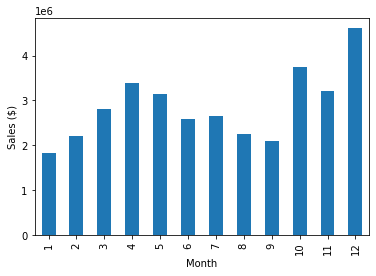

In [16]:
ax = df.groupby(['Month']).sum()['Sales'].plot(kind='bar')
plt.ylabel('Sales ($)')
plt.xlabel('Month')
plt.show()